In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("data.csv")
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store


In [5]:
data.describe()

#prices ,sales and profits are "strings"

,Retailer ID
count,9.648000e+03
mean,1.173850e+06
std,2.636038e+04
min,1.128299e+06
25%,1.185732e+06
50%,1.185732e+06
75%,1.185732e+06
max,1.197831e+06


In [6]:
data.shape

(9648, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


In [8]:
data.dtypes

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Sales Method        object
dtype: object

In [9]:
cat_data = data.select_dtypes("object")

In [10]:
cat_data.columns

Index(['Retailer', 'Invoice Date', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Sales Method'],
      dtype='object')

In [11]:
for i in cat_data.columns:
    print("column name : " , i , "------" , "value_counts" , data[i].value_counts() )

column name :  Retailer ------ value_counts Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64
column name :  Invoice Date ------ value_counts Invoice Date
1/17/2021     77
8/17/2021     72
3/16/2021     72
4/17/2021     72
11/17/2021    71
              ..
6/14/2020      2
6/15/2020      2
6/17/2020      2
6/18/2020      2
6/16/2020      2
Name: count, Length: 724, dtype: int64
column name :  Region ------ value_counts Region
West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Name: count, dtype: int64
column name :  State ------ value_counts State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Conn

In [12]:
data["Region"]

0       Northeast
1       Northeast
2       Northeast
3       Northeast
4       Northeast
          ...    
9643    Northeast
9644    Northeast
9645    Northeast
9646    Northeast
9647    Northeast
Name: Region, Length: 9648, dtype: object

In [13]:
data["Region"].value_counts()

Region
West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Name: count, dtype: int64

In [14]:
#cleaning the data

In [15]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store


In [16]:
data["Total Sales"] = data["Total Sales"].str.replace("," , "")

In [17]:
data["Total Sales"]

0       60000
1       50000
2       40000
3       38250
4       54000
        ...  
9643      320
9644      431
9645      754
9646      294
9647      241
Name: Total Sales, Length: 9648, dtype: object

In [18]:
data["Total Sales"] = data["Total Sales"].astype("float")

In [19]:
data["Total Sales"]

0       60000.0
1       50000.0
2       40000.0
3       38250.0
4       54000.0
         ...   
9643      320.0
9644      431.0
9645      754.0
9646      294.0
9647      241.0
Name: Total Sales, Length: 9648, dtype: float64

In [20]:
data.describe()

,Retailer ID,Total Sales
count,9.648000e+03,9648.000000
mean,1.173850e+06,9327.367537
std,2.636038e+04,14191.586965
min,1.128299e+06,0.000000
25%,1.185732e+06,425.750000
50%,1.185732e+06,958.000000
75%,1.185732e+06,15000.000000
max,1.197831e+06,82500.000000


In [21]:
data["Operating Profit"] = data["Operating Profit"].str.replace("$","").str.replace(",","")

In [22]:
data["Operating Profit"] = data["Operating Profit"].astype("float")

In [23]:
data["Price per Unit"] = data["Price per Unit"].str.replace("$","").str.replace(",","")

In [24]:
data["Price per Unit"] = data["Price per Unit"].astype("float")

In [25]:
data["Units Sold"] = data["Units Sold"].str.replace(",","")

In [26]:
data["Units Sold"] = data["Units Sold"].astype("float")

In [27]:
data.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
count,9.648000e+03,9646.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.215633,256.930037,9327.367537,3442.564884
std,2.636038e+04,14.706055,214.252030,14191.586965,5419.341299
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000
25%,1.185732e+06,35.000000,106.000000,425.750000,192.000000
50%,1.185732e+06,45.000000,176.000000,958.000000,437.000000
75%,1.185732e+06,55.000000,350.000000,15000.000000,5206.000000
max,1.197831e+06,110.000000,1275.000000,82500.000000,39000.000000


In [28]:
data["Invoice Date"] = pd.to_datetime(data["Invoice Date"])

In [29]:
data.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit
count,9.648000e+03,9648,9646.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.215633,256.930037,9327.367537,3442.564884
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,425.750000,192.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,958.000000,437.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,15000.000000,5206.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,82500.000000,39000.000000
std,2.636038e+04,NaN,14.706055,214.252030,14191.586965,5419.341299


In [30]:
data["Invoice Date"]

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
9643   2021-01-24
9644   2021-01-24
9645   2021-02-22
9646   2021-02-22
9647   2021-02-22
Name: Invoice Date, Length: 9648, dtype: datetime64[ns]

In [31]:
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,50000.0,15000.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,40000.0,14000.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,38250.0,13388.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,54000.0,16200.0,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,320.0,90.0,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,431.0,138.0,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,754.0,279.0,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,294.0,123.0,Outlet


In [32]:
# extracting [ Invoice Date]  (Date == > month , year)

In [33]:
data["Month"] = data["Invoice Date"].dt.month

In [34]:
data["Year"] = data["Invoice Date"].dt.year

In [35]:
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,In-store,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,50000.0,15000.0,In-store,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,40000.0,14000.0,In-store,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,38250.0,13388.0,In-store,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,54000.0,16200.0,In-store,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,320.0,90.0,Outlet,1,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,431.0,138.0,Outlet,1,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,754.0,279.0,Outlet,2,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,294.0,123.0,Outlet,2,2021


In [36]:
data.drop("Retailer ID" , axis=1 , inplace=True)

In [37]:
data

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,In-store,1,2020
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,50000.0,15000.0,In-store,1,2020
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,40000.0,14000.0,In-store,1,2020
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,38250.0,13388.0,In-store,1,2020
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,54000.0,16200.0,In-store,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,320.0,90.0,Outlet,1,2021
9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,431.0,138.0,Outlet,1,2021
9645,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,754.0,279.0,Outlet,2,2021
9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,294.0,123.0,Outlet,2,2021


In [38]:
data.isnull().sum()

Retailer            0
Invoice Date        0
Region              7
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [39]:
data.Region = data.Region.fillna(value = data.Region.mode()[0] )

#fill the missing values of region by the most frequent value

In [40]:
data.isnull().sum()

Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [41]:
data["Price per Unit"] = data["Price per Unit"].fillna(value = data["Price per Unit"].median() )


In [42]:
data.isnull().sum()

Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

In [43]:
##================

In [44]:
data.groupby("Region")

In [45]:
data.groupby("Region")["Total Sales"].mean()

#southeast and west ::

Region
Midwest       7255.254147
Northeast     7841.955808
South         8347.471611
Southeast    13331.001634
West         11036.690991
Name: Total Sales, dtype: float64

In [46]:
data.groupby("Region")["Total Sales"].max()

Region
Midwest      61875.0
Northeast    78000.0
South        82500.0
Southeast    82500.0
West         73500.0
Name: Total Sales, dtype: float64

In [47]:
data.groupby("Region")["Total Sales"].agg(["mean","sum", "max" , "min"])

,mean,sum,max,min
Region,,,,
Midwest,7255.254147,13560070.0,61875.0,0.0
Northeast,7841.955808,18632487.0,78000.0,16.0
South,8347.471611,14407736.0,82500.0,51.0
Southeast,13331.001634,16317146.0,82500.0,75.0
West,11036.690991,27073003.0,73500.0,74.0


In [48]:
data.groupby("Product")["Total Sales"].mean()

#Men's aparel

Product
Men's Apparel                 7675.330218
Men's Athletic Footwear       9544.975155
Men's Street Footwear        12970.601863
Men's aparel                 54000.000000
Women's Apparel              11134.272388
Women's Athletic Footwear     6639.623288
Women's Street Footwear       7960.393657
Name: Total Sales, dtype: float64

In [49]:
data.groupby("Product")["Total Sales"].agg(["mean","max","min","sum" ])

,mean,max,min,sum
Product,,,,
Men's Apparel,7675.330218,61750.0,25.0,12318905.0
Men's Athletic Footwear,9544.975155,71250.0,74.0,15367410.0
Men's Street Footwear,12970.601863,81000.0,157.0,20882669.0
Men's aparel,54000.000000,54000.0,54000.0,54000.0
Women's Apparel,11134.272388,82500.0,91.0,17903910.0
Women's Athletic Footwear,6639.623288,54000.0,0.0,10663235.0
Women's Street Footwear,7960.393657,66500.0,37.0,12800313.0


In [50]:
data.groupby("Product")["Total Sales"].agg(["mean","sum", "max" , "min"])

#Men's Street Footwear

,mean,sum,max,min
Product,,,,
Men's Apparel,7675.330218,12318905.0,61750.0,25.0
Men's Athletic Footwear,9544.975155,15367410.0,71250.0,74.0
Men's Street Footwear,12970.601863,20882669.0,81000.0,157.0
Men's aparel,54000.000000,54000.0,54000.0,54000.0
Women's Apparel,11134.272388,17903910.0,82500.0,91.0
Women's Athletic Footwear,6639.623288,10663235.0,54000.0,0.0
Women's Street Footwear,7960.393657,12800313.0,66500.0,37.0


In [51]:
data.groupby(["Product" , "Region"])["Total Sales"].agg(["mean","max" ])

mean      max
Product                   Region                          
Men's Apparel             Midwest     5809.522436  39375.0
                          Northeast   6380.886076  58500.0
                          South       6841.378472  61750.0
                          Southeast  11990.960784  61750.0
                          West        8791.652709  56250.0
Men's Athletic Footwear   Midwest     6818.504823  40625.0
                          Northeast   7291.517677  56375.0
                          South       8836.456446  71250.0
                          Southeast  13616.205882  71250.0
                          West       12246.711165  64750.0
Men's Street Footwear     Midwest    12282.974359  61875.0
                          Northeast  12885.146465  78000.0
                          South       9876.614583  81000.0
                          Southeast  17656.514706  81000.0
                          West       13418.217073  72250.0
Men's aparel              Northeast  54000.000000  54000.0
Women's Apparel           Midwest     9040.516026  50750.0
                          Northeast   9480.593434  71500.0
                          South      10280.291667  82500.0
                          Southeast  15436.838235  82500.0
                          West       12791.948529  73500.0
Women's Athletic Footwear Midwest     4358.578778  34125.0
                          Northeast   4999.073232  49500.0
                          South       6396.107639  54000.0
                          Southeast   9952.377451  54000.0
                          West        8490.712531  48750.0
Women's Street Footwear   Midwest     5204.170418  37375.0
                          Northeast   5894.267677  52250.0
                          South       7853.965157  66500.0
                          Southeast  11333.112745  66500.0
                          West       10443.031707  58500.0

In [52]:
data.groupby("Sales Method")["Total Sales"].agg(["mean","sum", "max" , "min"])

#sale methode 'in store ' 

,mean,sum,max,min
Sales Method,,,,
In-store,20496.767241,35664375.0,82500.0,750.0
Online,5065.951933,24767439.0,82500.0,0.0
Outlet,9790.867175,29558628.0,78000.0,0.0


In [53]:
data.sort_values(by=["Total Sales"] , ascending=False).head(10)


#top 10 sales
# summer of 2021 /  Men's Street products / Southeast , South regions 

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
1970,West Gear,2021-06-17,South,Louisiana,New Orleans,Women's Apparel,110.0,750.0,82500.0,28875.0,Online,6,2021
1394,Walmart,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,110.0,750.0,82500.0,37125.0,In-store,6,2021
1971,West Gear,2021-07-16,South,Louisiana,New Orleans,Men's Street Footwear,90.0,900.0,81000.0,32400.0,Online,7,2021
1395,Walmart,2021-07-16,Southeast,Florida,Orlando,Men's Street Footwear,90.0,900.0,81000.0,24300.0,In-store,7,2021
1401,Walmart,2021-08-17,Southeast,Florida,Orlando,Men's Street Footwear,95.0,850.0,80750.0,24225.0,In-store,8,2021
1977,West Gear,2021-08-17,South,Louisiana,New Orleans,Men's Street Footwear,95.0,850.0,80750.0,32300.0,Online,8,2021
62,Walmart,2020-05-03,Northeast,New York,New York,Men's Street Footwear,65.0,1200.0,78000.0,39000.0,Outlet,5,2020
36,Foot Locker,2020-03-10,Northeast,New York,New York,Men's Street Footwear,60.0,1275.0,76500.0,38250.0,Outlet,3,2020
2361,Foot Locker,2021-12-05,Southeast,South Carolina,Charleston,Men's Street Footwear,70.0,1075.0,75250.0,33863.0,Online,12,2021
42,Foot Locker,2020-03-16,Northeast,New York,New York,Men's Street Footwear,60.0,1250.0,75000.0,37500.0,Outlet,3,2020


In [54]:
data.Product.value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1605
Men's aparel                    1
Name: count, dtype: int64

In [55]:
#####=======================================

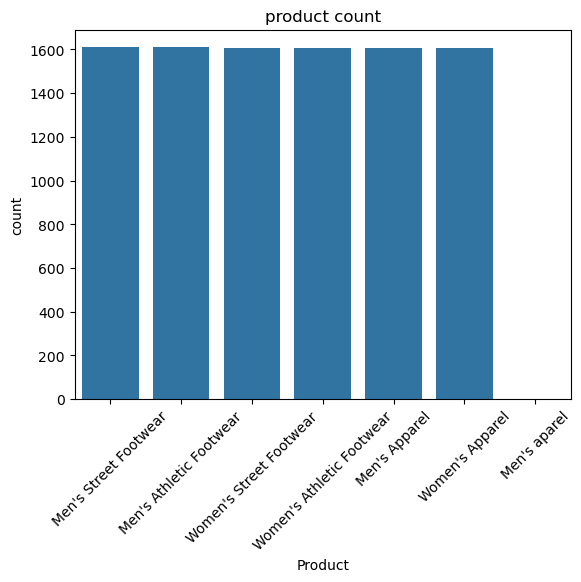

In [56]:
plt.xticks(rotation = 45)
plt.title("product count")
sns.countplot(data = data , x = "Product")
plt.show()



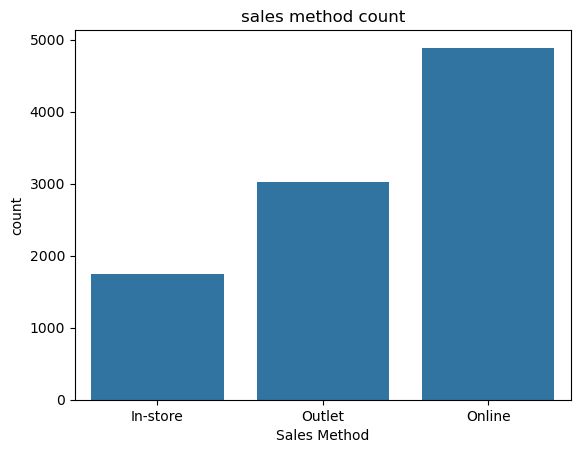

In [57]:
plt.title("sales method count")
sns.countplot(data = data , x="Sales Method")
plt.show()

#online is the best ==> more marketing , content creating , invest in online payements methods... / no need to invest in the stores 

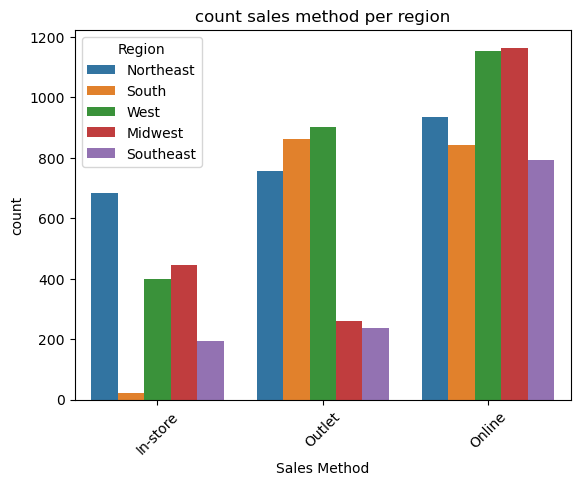

In [58]:
#sales method per region
plt.title("count sales method per region")
plt.xticks(rotation=45)
sns.countplot(data = data , x = "Sales Method" , hue= "Region")
plt.show()

<Axes: title={'center': 'counts per region'}, xlabel='Region', ylabel='count'>

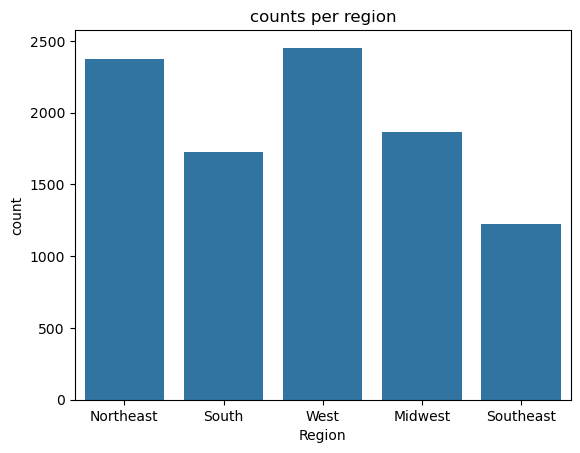

In [59]:
#top transactions per region
plt.title("counts per region")
sns.countplot(data = data , x = "Region")

<Axes: title={'center': 'total sales per region'}, xlabel='Region', ylabel='Total Sales'>

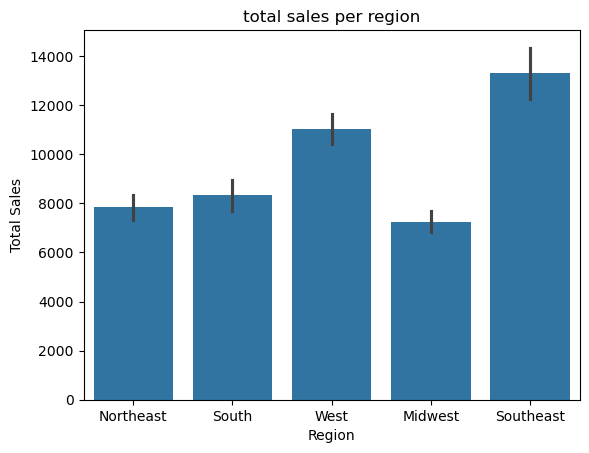

In [60]:
#top sales per region 
# ==> the west region makes more transaction number BUT not the one making the more sales total 
plt.title("total sales per region")
sns.barplot(data = data , x = "Region" , y = "Total Sales")


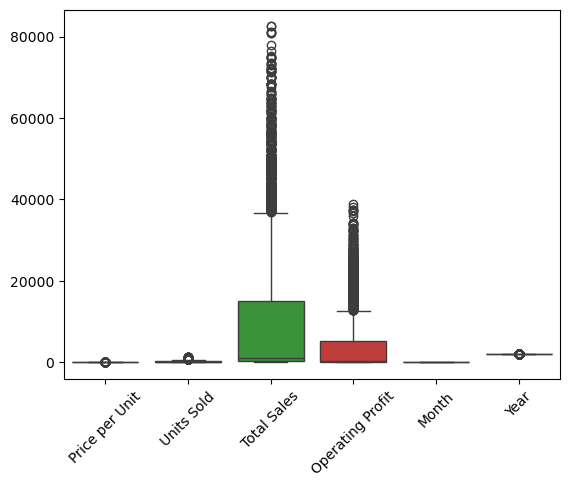

In [61]:
plt.xticks(rotation=45)
sns.boxplot(data = data)
plt.show()

In [62]:
data["Year"].unique()

array([2020, 2021])

<Axes: title={'center': 'sales counts per year for each product'}, xlabel='Product', ylabel='count'>

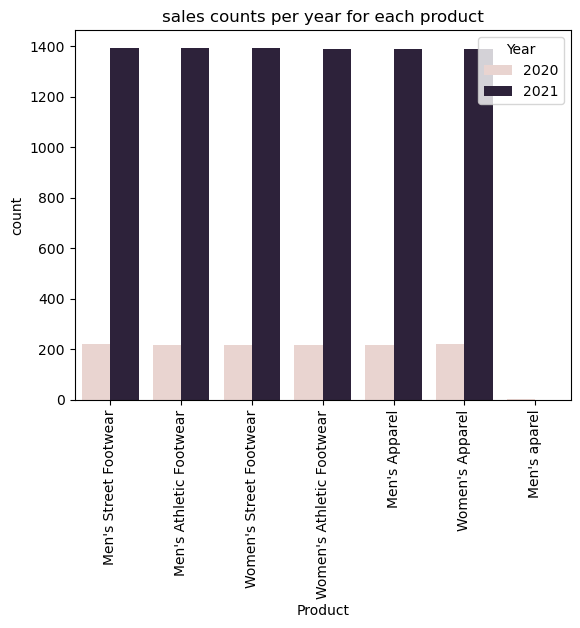

In [63]:
plt.xticks(rotation=90)
plt.title("sales counts per year for each product")
sns.countplot(data = data , x="Product" , hue="Year" )

<Axes: title={'center': 'total sales per product for each year'}, xlabel='Product', ylabel='Total Sales'>

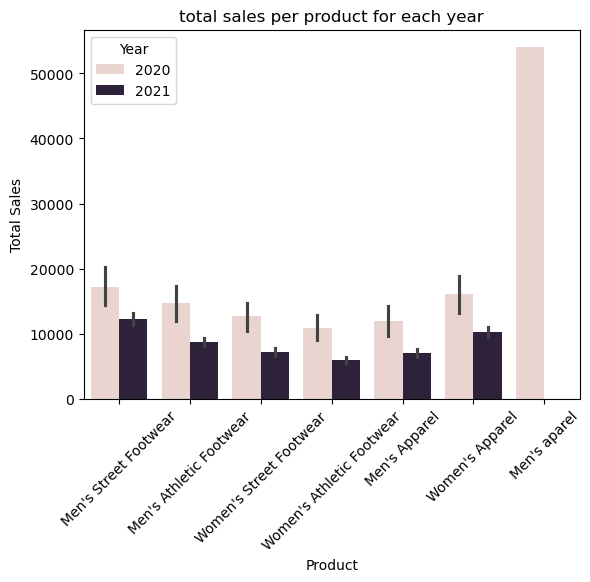

In [64]:
plt.xticks(rotation=45)
plt.title("total sales per product for each year")
sns.barplot(data = data , x = "Product" , y = "Total Sales" , hue = "Year")

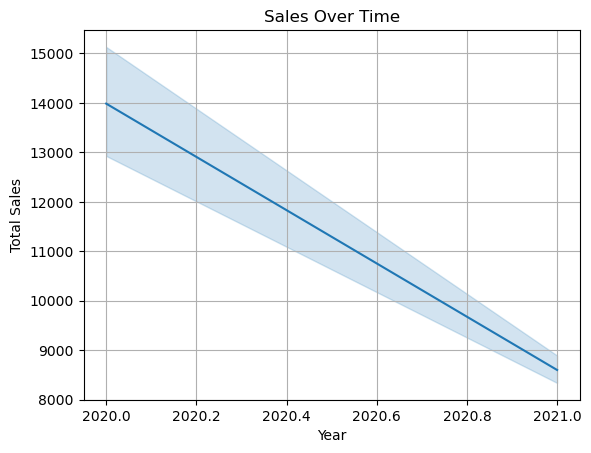

In [65]:
#sales over time

sns.lineplot(x="Year" , y = "Total Sales" , data = data)
plt.title("Sales Over Time")
plt.grid()
plt.show()

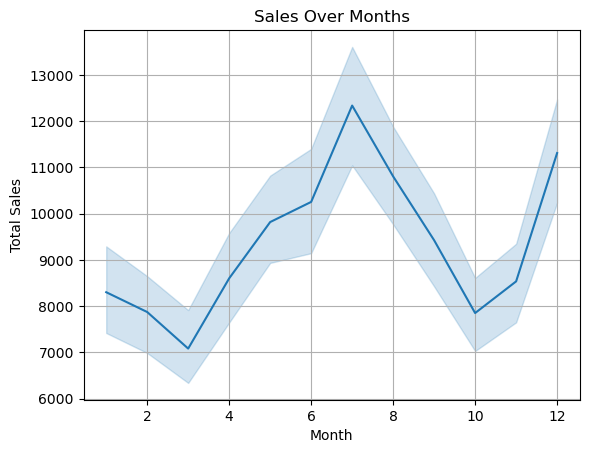

In [66]:
sns.lineplot(x="Month" , y = "Total Sales" , data = data)
plt.title("Sales Over Months")
plt.grid()
plt.show()

#summer and last quarter

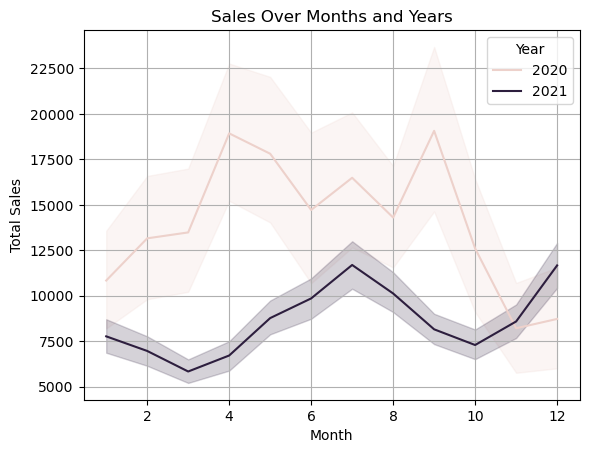

In [67]:
sns.lineplot(x="Month" , y = "Total Sales" , hue="Year" , data = data)
plt.title("Sales Over Months and Years")
plt.grid()
plt.show()


<Axes: title={'center': 'Corrolation'}>

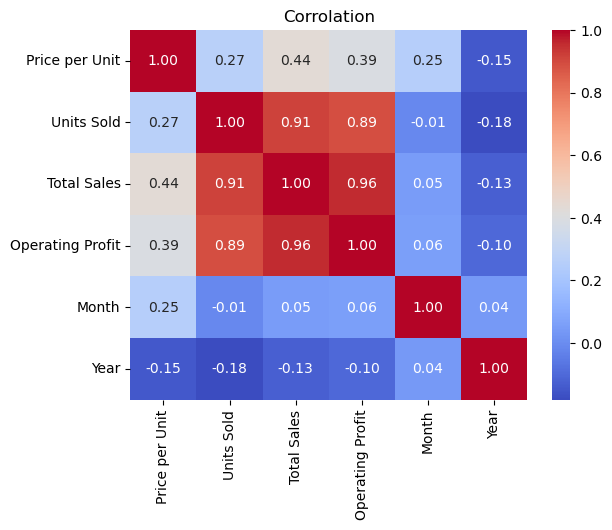

In [68]:
#corrolation

numeric_data = data.select_dtypes(include=["number"])
corr_matrix = numeric_data.corr()
plt.title("Corrolation")

sns.heatmap(corr_matrix , annot =True , cmap="coolwarm" , fmt=".2f" , cbar=True)

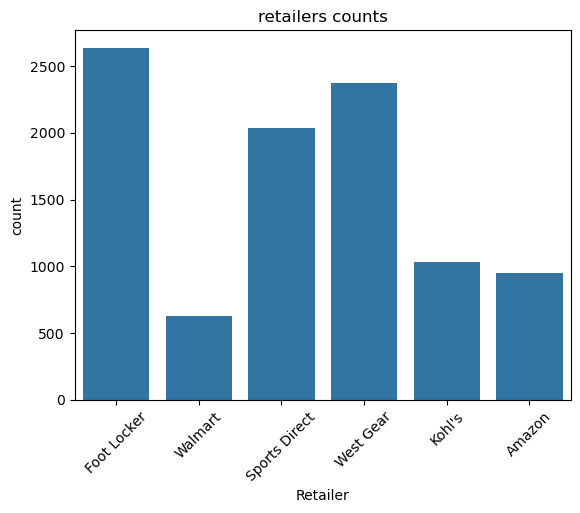

In [69]:
#retailers

plt.xticks(rotation=45)
plt.title("retailers counts")
sns.countplot(data = data , x="Retailer")
plt.show()

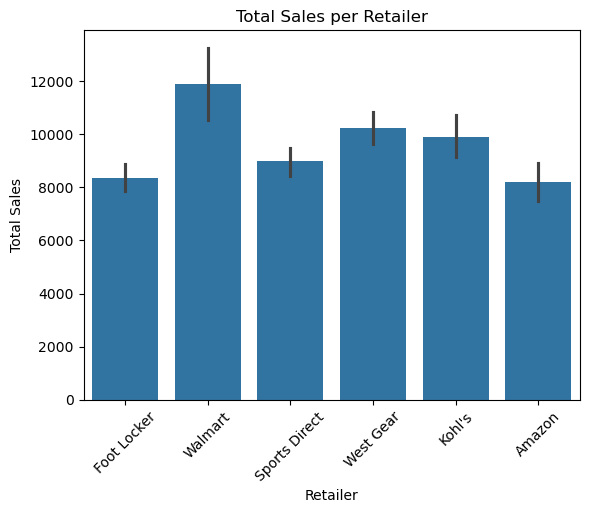

In [70]:
plt.xticks(rotation=45)
plt.title("Total Sales per Retailer")
sns.barplot(data = data , x="Retailer" , y = "Total Sales")
plt.show()